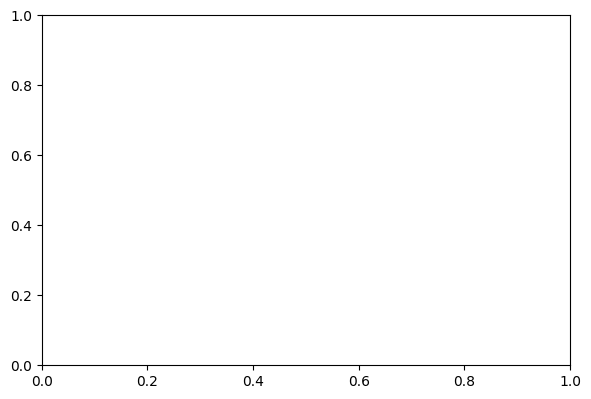

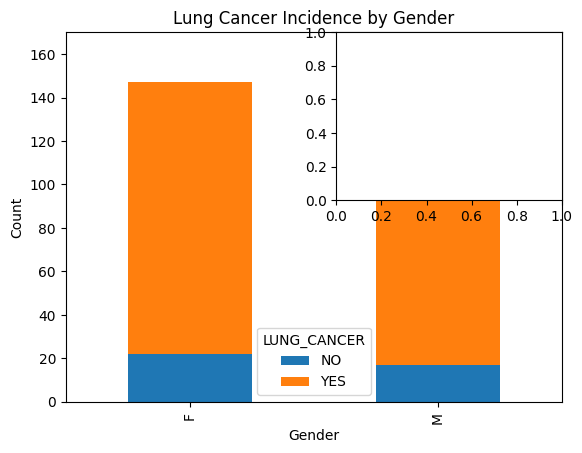

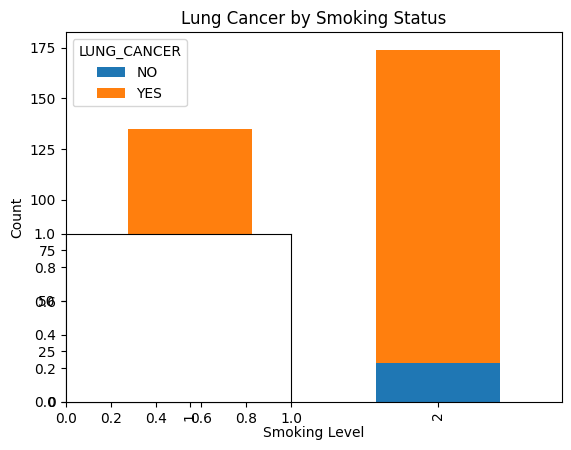

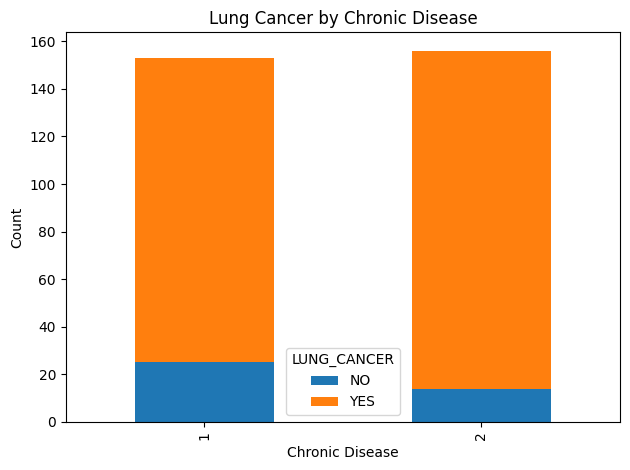

ValueError: could not convert string to float: 'M'

<Figure size 1200x1000 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Load the data
df = pd.read_csv('survey lung cancer.csv')

def plot_categorical_distributions(df):
    """Create bar charts for categorical variables"""
    plt.figure(figsize=(15, 10))
    
    # Lung Cancer by Gender
    plt.subplot(2, 2, 1)
    df.groupby(['GENDER', 'LUNG_CANCER']).size().unstack().plot(kind='bar', stacked=True)
    plt.title('Lung Cancer Incidence by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Smoking Status Distribution
    plt.subplot(2, 2, 2)
    df.groupby(['SMOKING', 'LUNG_CANCER']).size().unstack().plot(kind='bar', stacked=True)
    plt.title('Lung Cancer by Smoking Status')
    plt.xlabel('Smoking Level')
    plt.ylabel('Count')
    
    # Chronic Disease Distribution
    plt.subplot(2, 2, 3)
    df.groupby(['CHRONIC DISEASE', 'LUNG_CANCER']).size().unstack().plot(kind='bar', stacked=True)
    plt.title('Lung Cancer by Chronic Disease')
    plt.xlabel('Chronic Disease')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

def correlation_heatmap(df):
    """Create a correlation heatmap"""
    # Convert categorical columns to numeric
    numeric_df = df.copy()
    numeric_df['LUNG_CANCER'] = (numeric_df['LUNG_CANCER'] == 'YES').astype(int)
    
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Lung Cancer Risk Factors')
    plt.tight_layout()
    plt.show()

def age_distribution_plot(df):
    """Box plot and histogram of age by lung cancer status"""
    plt.figure(figsize=(12, 5))
    
    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='LUNG_CANCER', y='AGE', data=df)
    plt.title('Age Distribution by Lung Cancer Status')
    
    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(data=df, x='AGE', hue='LUNG_CANCER', multiple='stack', bins=20)
    plt.title('Age Histogram by Lung Cancer Status')
    
    plt.tight_layout()
    plt.show()

def feature_importance_plot(df):
    """Plot feature importance using Random Forest Classifier"""
    # Prepare the data
    X = df.drop('LUNG_CANCER', axis=1)
    y = (df['LUNG_CANCER'] == 'YES').astype(int)
    
    # Encode categorical variables
    X = pd.get_dummies(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
    sns.barplot(x=feature_imp.values[:10], y=feature_imp.index[:10])
    plt.title('Top 10 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

def roc_curve_plot(df):
    """Plot ROC Curve"""
    # Prepare the data
    X = df.drop('LUNG_CANCER', axis=1)
    y = (df['LUNG_CANCER'] == 'YES').astype(int)
    
    # Encode categorical variables
    X = pd.get_dummies(X)
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Compute ROC curve and ROC area
    y_pred_proba = rf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage
plot_categorical_distributions(df)
correlation_heatmap(df)
age_distribution_plot(df)
feature_importance_plot(df)
roc_curve_plot(df)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
 

# Load dataset
data = pd.read_csv('survey lung cancer.csv')  # Replace with your file path

le = LabelEncoder()

data['GENDER'] = le.fit_transform(data['GENDER'])
data['SMOKING'] = le.fit_transform(data['SMOKING'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

# Split into features and target
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']  # Encode target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model and Train the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# LOAD the MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

nn_pred = nn_model.predict(X_test)

lr_pred = lr_model.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))
accuracy = accuracy_score(y_test, rf_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Evaluate



Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Model Accuracy: 96.77%


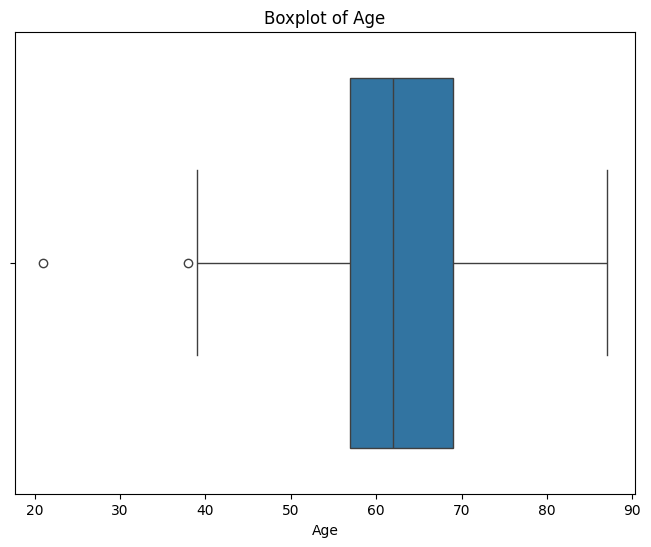

In [16]:
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.boxplot(x=data['AGE'])  # Create the boxplot for the 'AGE' column

# Set the title and labels
plt.title('Boxplot of Age')
plt.xlabel('Age')

# Display the plot
plt.show()

In [8]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))
accuracy = accuracy_score(y_test, lr_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

Model Accuracy: 96.77%


In [14]:
accuracy = accuracy_score(y_test, nn_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, nn_pred))
print("\nClassification Report:")
print(classification_report(y_test, lr_pred))

Model Accuracy: 95.16%
Confusion Matrix:
[[ 0  2]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

